In [7]:
%pylab inline
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import scipy

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pandas.read_json('/Users/Home/Desktop/CMPT 459/projectDataset/train.json')

# Finding number of missing values in each column

In [6]:
countFeatures = 0
for row in data.features:
    if not row:
        countFeatures += 1
print('Features missing: ', countFeatures)

# Building ID
countBuildingID = 0
for row in data.building_id:
    if row == '0':
        countBuildingID += 1
print('BuildingID missing: ', countBuildingID)

#descriptions missing
countDescription = 0
for row in data.description:
    if row.isspace() or not row:
        countDescription += 1
print('Descriptions missing: ', countDescription)

# bathrooms missing
countBathrooms = 0
for row in data.bathrooms:
    if not row:
        countBathrooms += 1
print('Bathroom missing: ', countBathrooms)

# bedroom misisng
countBedrooms = 0
for row, desrow in zip(data.bedrooms, data.description):
#     desrow.lower()
    if not row and (("studio" not in desrow) and ("STUDIO" not in desrow) and ("Studio" not in desrow)) :
#         print(desrow)
        countBedrooms += 1
print('Bedrooms missing: ', countBedrooms)

# Missing created
countCreated = 0
for row in data.created:
    if not row:
        countCreated += 1
print('Created missing: ', countCreated)

# Display address missing
countDisplayID = 0
for row in data.display_address:
    if row.isspace() or not row:
        countDisplayID += 1
print('Display missing: ', countDisplayID)

#latitude missing
countLat = 0
for row in data.latitude:
    if not row:
        countLat += 1
print('Latitude missing: ', countLat)

#longitude missing
countLong = 0
for row in data.longitude:
    if not row:
        countLong += 1
print('Longitude missing: ', countLong)

#listing id missing
countListingID = 0
for row in data.listing_id:
    if not row:
        countListingID += 1
print('Listing missing: ', countListingID)


# missing manager id
countManagerID = 0
for row in data.manager_id:
    if not row:
        countManagerID += 1
print('Missing managerID: ', countManagerID)

# missing price
countPrice = 0
for row in data.price:
    if not row:
        countPrice += 1
print('price missing: ', countPrice)

#missing street variable
countStreet = 0
for row in data.street_address:
    if row.isspace() or not row:
        countStreet += 1
print('missing street: ', countStreet)

# missing interest levels
countInterest = 0
for row in data.interest_level:
    if not row:
        countInterest += 1
print('Missing interest: ', countInterest)

#missing photos
countPhotos = 0
for row in data.photos:
    if not row:
        countPhotos += 1
print('Missing photos: ', countPhotos)

Features missing:  3218
BuildingID missing:  8286
Descriptions missing:  3333
Bathroom missing:  313
Bedrooms missing:  3149
Created missing:  0
Display missing:  137
Latitude missing:  12
Longitude missing:  12
Listing missing:  0
Missing managerID:  0
price missing:  0
missing street:  10
Missing interest:  0
Missing photos:  3615


# Mapping long and lat using 95th percentile of those values

(40.7, 41)

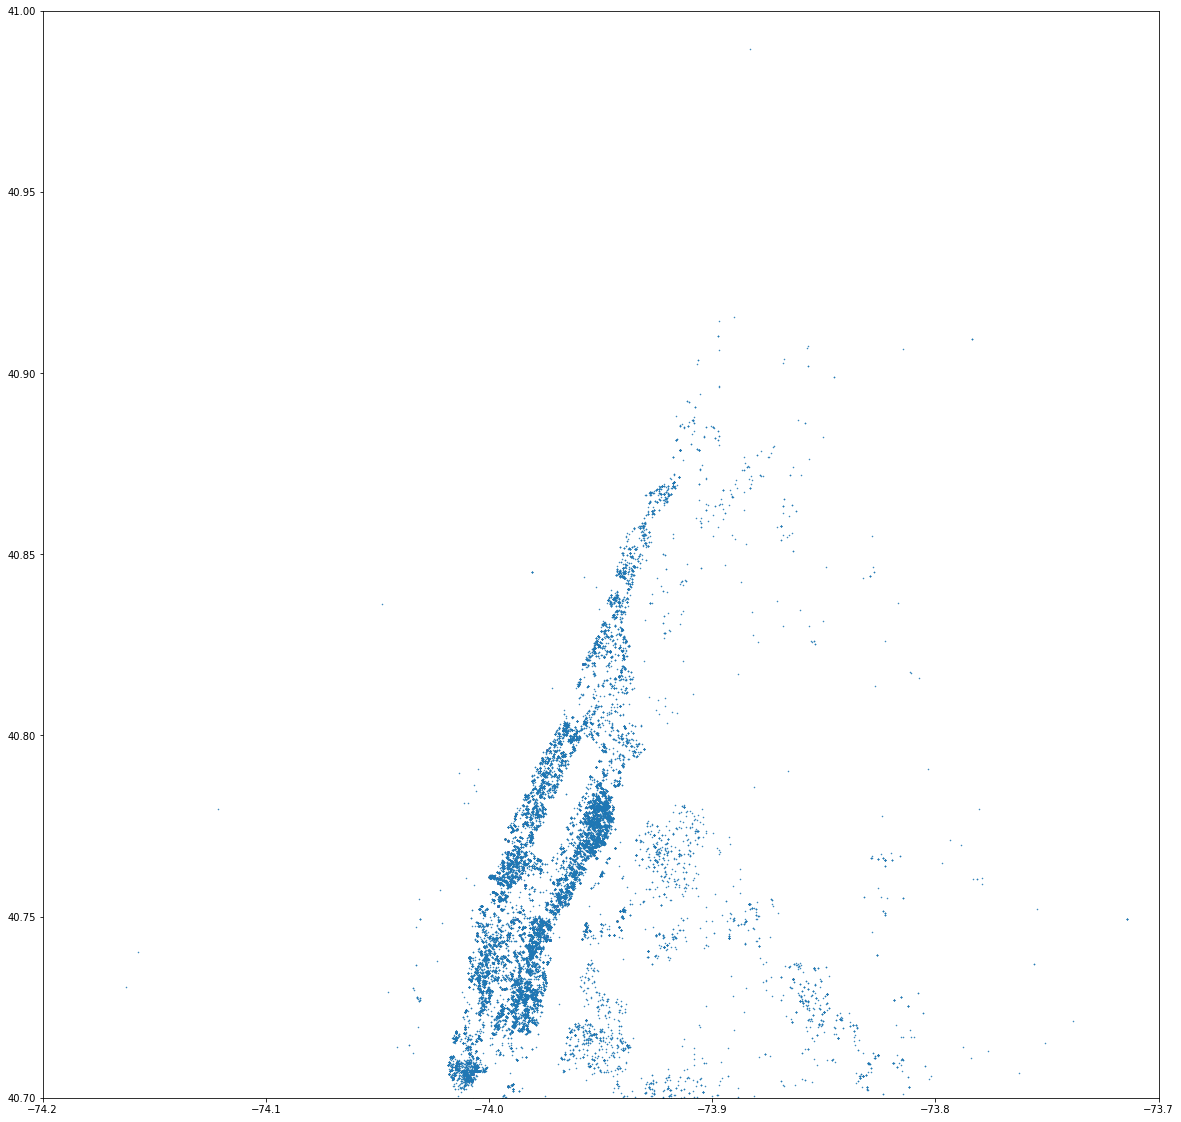

In [10]:
figure(figsize=(20,20))
plot(data['longitude'], data['latitude'], '.', ms=1)
xlim(-74.2, -73.7)
ylim(40.7, 41)

# Box plot of price, lat and long to demonstrate outliers

(0, 17000)

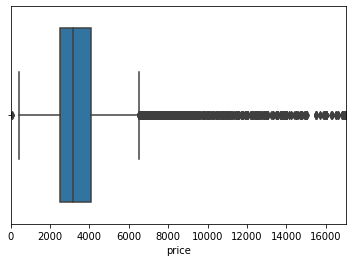

In [27]:
seaborn.boxplot(x=data['price'])
# xlim(0, 17000)

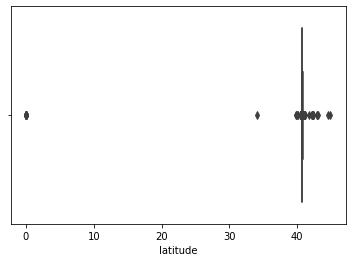

In [12]:
seaborn.boxplot(x=data['latitude'])

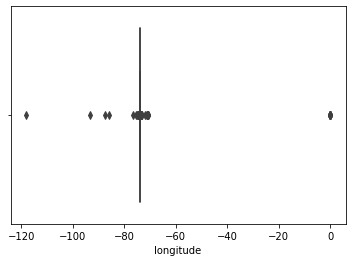

In [13]:
seaborn.boxplot(x=data['longitude'])

# box plots for outlier visualizations for other variables

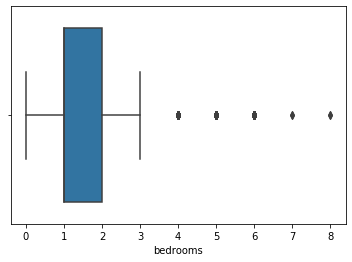

In [19]:
seaborn.boxplot(x=data['bedrooms'])

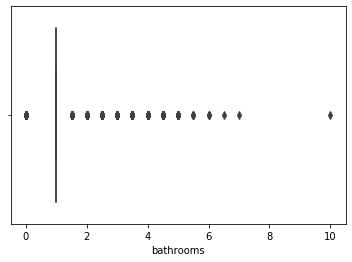

In [20]:
seaborn.boxplot(x=data['bathrooms'])

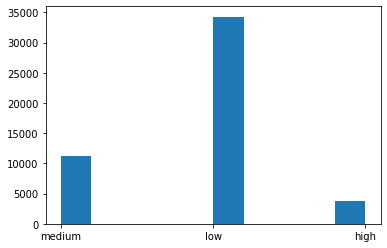

In [25]:
plt.hist(data['interest_level'])
plt.show()

# Mapping 

In [ ]:
data['created'] = data['created'].map(pandas.to_datetime)